# Importing necessary packages

In [54]:
import pandas as pd # For handling the data

import seaborn as sns # For plotting
import matplotlib.pyplot as plt 
import plotly_express as px 

import numpy as np

import plotly.io as pio
pio.templates.default = "gridon" # Sets "gridon" as default for all Plotly graphs

# reading in the file


In [110]:
df = pd.read_excel("../Lab_Data/Covid19.xlsx", sheet_name="Veckodata Riket") # Using pandas read_excel function to read the data in excel


## Initial Data Analisys

In [56]:
df.head(3) #  To get the 3 first just to see what the column names are and a bit of info och what the data looks like

,år,veckonummer,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv
0,2020,6,1,0,0,1,0,0,0,0,0.0,0,0.0
1,2020,7,0,0,0,1,0,0,0,0,0.0,0,0.0
2,2020,8,0,0,0,1,0,0,0,0,0.0,0,0.0


In [57]:
df.info() # Get relevant data och how many entries are null and what Data type they are
# No nulls, No objects in data types.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   år                              142 non-null    int64  
 1   veckonummer                     142 non-null    int64  
 2   Antal_fall_vecka                142 non-null    int64  
 3   Antal_fall_100000inv_vecka      142 non-null    int64  
 4   Antal_fall_100000inv_14dagar    142 non-null    int64  
 5   Kum_antal_fall                  142 non-null    int64  
 6   Kum_fall_100000inv              142 non-null    int64  
 7   Antal_nyaintensivvårdade_vecka  142 non-null    int64  
 8   Kum_antal_intensivvårdade       142 non-null    int64  
 9   Antal_avlidna_vecka             142 non-null    int64  
 10  Antal_avlidna_milj_inv_vecka    142 non-null    float64
 11  Kum_antal_avlidna               142 non-null    int64  
 12  Kum_antal_avlidna_milj_inv      142 

In [58]:
df.describe() # Get useful data like max number in veckonumber is 53. 

,år,veckonummer,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv
count,142.000000,142.000000,142.000000,142.000000,142.000000,1.420000e+02,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,2020.957746,26.035211,18378.345070,177.197183,354.169014,1.125288e+06,10843.281690,67.176056,6000.464789,144.936620,14.000000,12321.154930,1187.840841
std,0.797809,14.228835,38569.455753,371.689114,725.677174,9.618084e+05,9265.100705,73.435000,3076.853993,173.659331,16.796551,6103.235009,587.255605
min,2020.000000,1.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2020.000000,14.000000,3075.000000,30.000000,59.750000,1.014860e+05,982.500000,14.000000,2643.750000,25.250000,2.425000,5880.000000,569.375000
50%,2021.000000,26.000000,5531.000000,53.000000,107.500000,1.085848e+06,10461.500000,27.500000,7559.500000,77.500000,7.450000,14610.500000,1407.650024
75%,2022.000000,37.750000,21125.000000,203.500000,421.250000,2.423603e+06,23350.500000,109.000000,8863.250000,185.500000,17.950000,17177.750000,1654.999969
max,2022.000000,53.000000,265043.000000,2554.000000,5024.000000,2.609725e+06,25144.000000,289.000000,9539.000000,664.000000,64.300003,20581.000000,1982.900024


In [109]:
df.isnull().sum() # No nulls.

Week                              0
Antal_fall_vecka                  0
Antal_fall_100000inv_vecka        0
Antal_fall_100000inv_14dagar      0
Kum_antal_fall                    0
Kum_fall_100000inv                0
Antal_nyaintensivvårdade_vecka    0
Kum_antal_intensivvårdade         0
Antal_avlidna_vecka               0
Antal_avlidna_milj_inv_vecka      0
Kum_antal_avlidna                 0
Kum_antal_avlidna_milj_inv        0
dtype: int64

# Combine Year and Veckonummer

In [111]:
df.insert(0, "Week", df["år"].astype(str) + "v" + df["veckonummer"].astype(str)) # Combining År and Veckonummer into Vecka. Added a v in between
df.pop("år") # Removing år and veckonummer
df.pop("veckonummer")

df.head()

,Week,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv
0,2020v6,1,0,0,1,0,0,0,0,0.0,0,0.0
1,2020v7,0,0,0,1,0,0,0,0,0.0,0,0.0
2,2020v8,0,0,0,1,0,0,0,0,0.0,0,0.0
3,2020v9,13,0,0,14,0,0,0,0,0.0,0,0.0
4,2020v10,211,2,2,225,2,3,3,0,0.0,0,0.0


## Plotting with Seaborn

In [112]:
df.index

RangeIndex(start=0, stop=142, step=1)

In [ ]:
year = df["Week"]
datapoints = {
    "Antal_avlidna_vecka": "Antal Avlidna per Vecka",
    "Antal Fall per Vecka": "Antal_fall_vecka",
    "Avlidna och Fall / Vecka": "Antal_avlidna_vecka",
    "Kumulativt Antal Fall": "Kum_antal_fall",
}
fig, axes = plt.subplots(2,2, figsize = (16, 12), dpi = 120)
for ax, symbol in zip(axes.flatten(), datapoints):
    sns.lineplot(data = df, x = year, y = symbol, ax = ax,)
    ax.set(title = f"{datapoints[symbol]}", ylabel = "Price in (USD) $")
    ax.tick_params(axis = "x", rotation = 30)
fig.tight_layout()
fig.suptitle("A few teck stocks", y = 1.05, fontweight = "bold", fontsize = 20)

In [ ]:
fig, axes = plt.subplots(2,2, figsize = (16, 12), dpi = 120)
for ax, symbol in zip(axes.flatten(), datapoints):

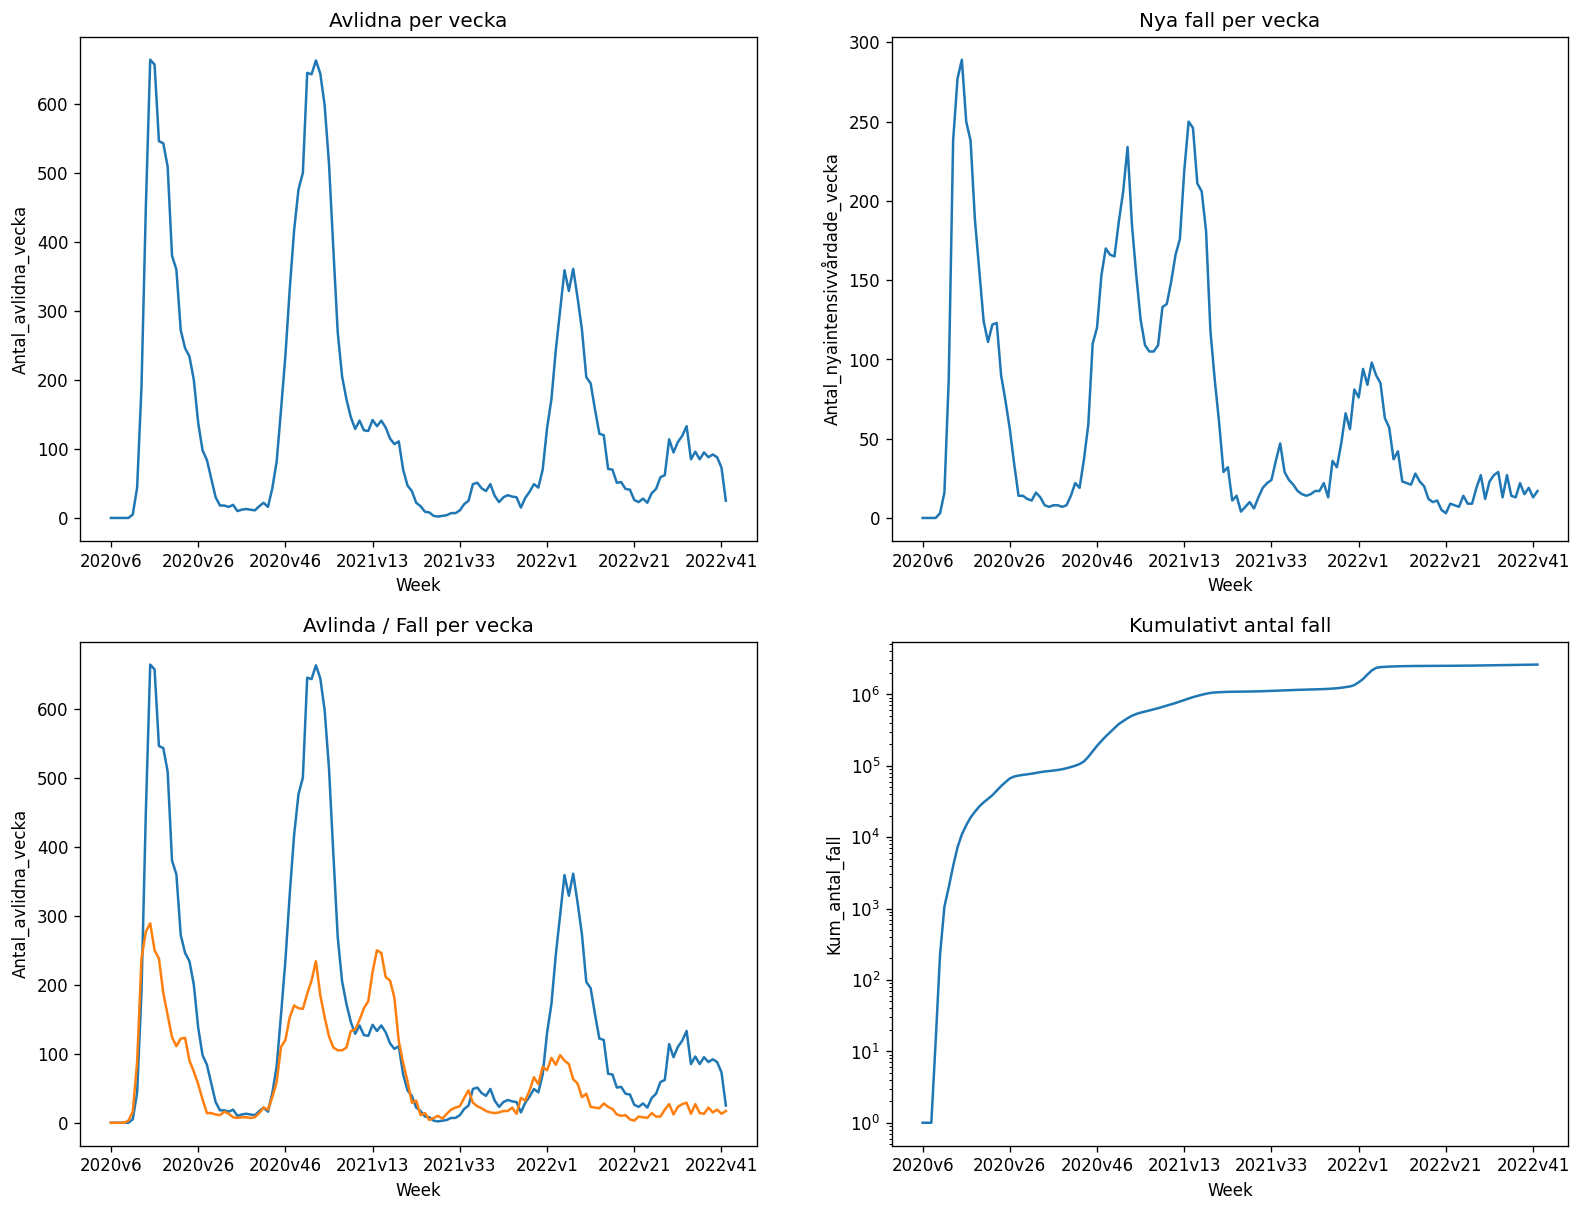

In [122]:

year = df["Week"]

fig, ax = plt.subplots(2,2, figsize = (16, 12), dpi = 120)

sns.lineplot(df, x = year, y = df["Antal_avlidna_vecka"], ax = ax[0,0]) # Title is not informativ. Change later
sns.lineplot(df, x = year, y = df["Antal_nyaintensivvårdade_vecka"], ax = ax[0,1]) # Same as above

sns.lineplot(df, x = year, y = df["Antal_avlidna_vecka"], ax = ax[1,0])
sns.lineplot(df, x = year, y = df["Antal_nyaintensivvårdade_vecka"], ax = ax[1,0]) # Same as above

sns.lineplot(df, x = year, y = df["Kum_antal_fall"], ax = ax[1,1]).set_yscale("log") # Same as above


ax[0,0].xaxis.set_major_locator(plt.MaxNLocator(9))
ax[0,1].xaxis.set_major_locator(plt.MaxNLocator(9))
ax[1,0].xaxis.set_major_locator(plt.MaxNLocator(9))
ax[1,1].xaxis.set_major_locator(plt.MaxNLocator(9))

ax[0,0].set(title="Avlidna per vecka")
ax[0,1].set(title="Nya fall per vecka")
ax[1,0].set(title="Avlinda / Fall per vecka")
ax[1,1].set(title="Kumulativt antal fall");

#TODO SAVE FILE

In [63]:
# Creating lists of necessary data
# 

# Function for plotting Seaborn Graphs

In [64]:
# Function for plotting seaborn graphs.
titles = [
    "Antal Avlidna per Vecka",
    "Antal Fall per Vecka",
    "Avlidna och Fall / Vecka",
    "Kumulativt Antal Fall",
]
datapoints = [
    "Antal_avlidna_vecka",
    "Antal_fall_vecka",
    "Antal_avlidna_vecka",
    "Antal_fall_vecka",
    "Kum_antal_fall",
]
y_label = ["Antal Personer"] * 4


def sns_plot_func(x, y, label, data):  # setting the function
    """Used to quickly plot with seaborn"""  # Docstring PLACEHOLDER
    fig, ax = plt.subplots(
        figsize=(16, 8), dpi=120
    )  # Subplot. TODO add actual subplots with ifstatement to check if list is >=2
    sns.lineplot(data=data, x=x, y=y, label=label)  # Plot code
    ax.xaxis.set_major_locator(
        plt.MaxNLocator(15)
    )  # Set major locator to not show all values on x.
    ax.xaxis.set_tick_params(rotation=-45)
    #ax.set_ylabel(y_label)
    if (
        data[y].max() >= 10**6
    ):  # ifstatement to see if y data is above 1000000. if it is set yscale to logorithmic scale.
        ax.set_yscale("log")


#for axes, title, y_label in zip(ax.reshape(-1), titles, y_label):
#for i in range(5):
    #sns_plot_func(year, datapoints[i], titles[i], df)

#TODO SAVE FILE

4
4
['Antal_avlidna_vecka', 'Antal_fall_vecka', 'Antal_avlidna_vecka', 'Antal_fall_vecka', 'Kum_antal_fall']


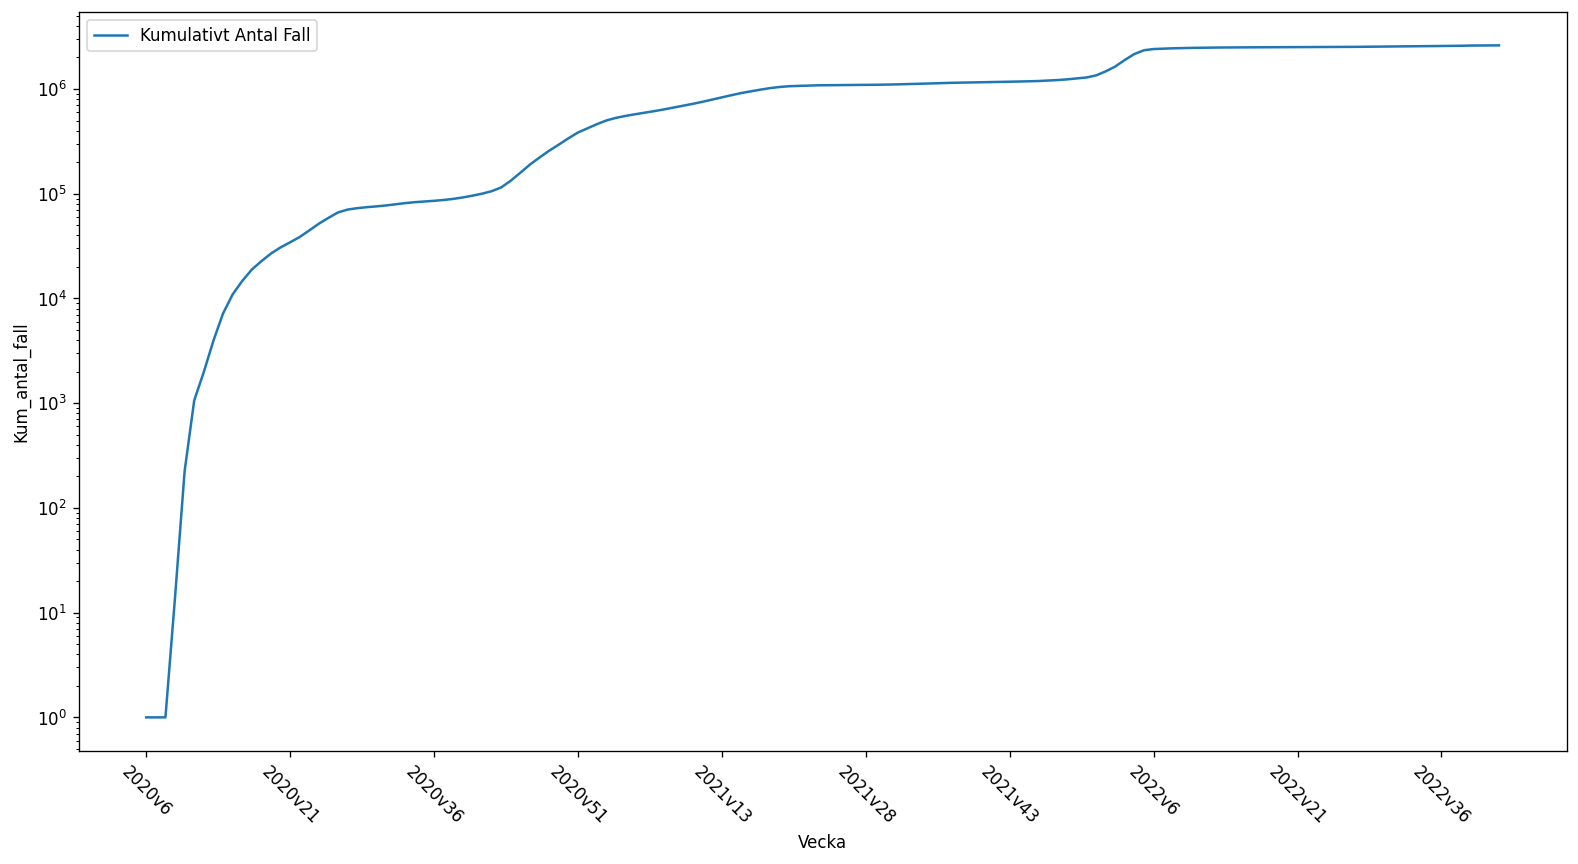

In [65]:
sns_plot_func(year, "Kum_antal_fall",titles[3], df)#, #sns_plot_func(year, "Antal_nyaintensivvårdade_vecka",df)
print(len(y_label))
print(len(titles))
print((datapoints))
#TODO SAVE FILE

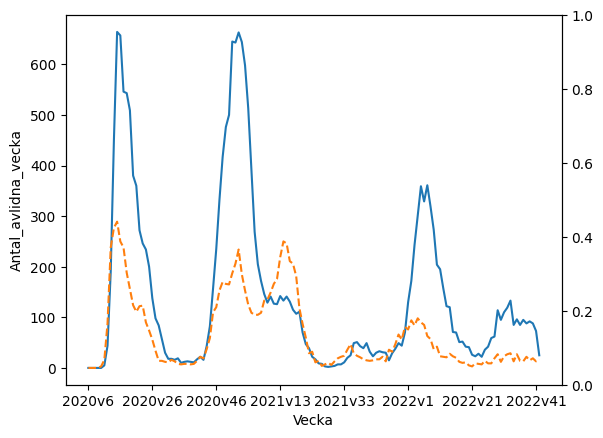

In [66]:
sns.lineplot(df, x = year, y = df["Antal_avlidna_vecka"]).xaxis.set_major_locator(plt.MaxNLocator(9)) # Title is not informative. Change later
sns.lineplot(df, x = year, y = df["Antal_nyaintensivvårdade_vecka"], linestyle = "dashed").twinx();#.xaxis.set_major_locator(plt.MaxNLocator(9)) # Same as above

#TODO FIX LEGEND
#TODO SAVE FILE

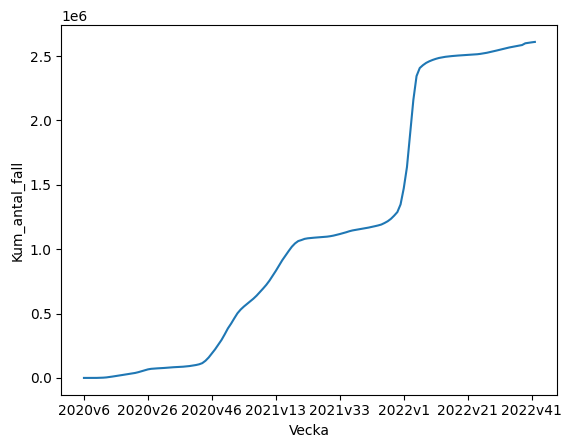

In [67]:
# f) Rita linjediagram av kumulativt antal fall från 2020v6 till nu.

fig = sns.lineplot(df, x = year, y = df["Kum_antal_fall"]).xaxis.set_major_locator(plt.MaxNLocator(9))

#TODO SAVE FILE

# Plotly express plotting C-F

In [68]:
fig = px.line(df, x = "Vecka", y = "Antal_avlidna_vecka", title = "Antal Avldina per Vecka")
fig.update_layout(yaxis_title = "Antal Personer")
fig.update_xaxes(tickangle=45)
fig.show()
#TODO SAVE FILE

In [69]:
fig = px.line(df, x = "Vecka", y = "Antal_fall_vecka", title = "Antal Fall per Vecka")
fig.update_layout(yaxis_title = "Antal Personer")
fig.update_xaxes(tickangle=45)
fig.show()
#TODO SAVE FILE

In [70]:
fig = px.line(df, x = "Vecka", y = ["Antal_avlidna_vecka","Antal_fall_vecka"], title = "Antal Avlidna och Fall per Vecka", )
fig.update_layout(yaxis_title = "Antal Personer")
fig.update_xaxes(tickangle=45)
fig.show()
#TODO SAVE FILE

In [71]:
fig = px.line(df, x = "Vecka", y = "Kum_antal_fall", title = "Kumulativt Antal Fall per vecka", template= "presentation")
fig.update_layout(yaxis_title = "Antal Personer")
fig.update_xaxes(tickangle=45)
fig.show()
#TODO SAVE FILE

## Uppgift 2

In [72]:
df_vaccine = pd.read_excel("../Lab_Data/Vaccine.xlsx", sheet_name= "Vaccinerade kommun och ålder")

In [73]:

df_vaccine.rename(columns={"Ålder": "Age group"}, inplace=True) # Renaming Ålder into Age group.
df_vaccine.replace(
    {"90 eller äldre": "90 or older"},
    inplace=True,)

In [74]:
df_vaccine.head()
df_vaccine.info()  # Län_namn, Kommun_namn and Ålder are objects. rest are int or floats
df_vaccine.isnull().sum() # Ammount of nulls are: Antal 3 doser 580, Antal 4 doser 2030, Andel 3 doser 580, Andel 4 doser 2030


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Län                  2900 non-null   int64  
 1   Län_namn             2900 non-null   object 
 2   Kommun               2900 non-null   int64  
 3   Kommun_namn          2900 non-null   object 
 4   Age group            2900 non-null   object 
 5   Befolkning           2900 non-null   int64  
 6   Antal minst 1 dos    2900 non-null   int64  
 7   Antal minst 2 doser  2900 non-null   int64  
 8   Antal 3 doser        2320 non-null   float64
 9   Antal 4 doser        870 non-null    float64
 10  Andel minst 1 dos    2900 non-null   float64
 11  Andel minst 2 doser  2900 non-null   float64
 12  Andel 3 doser        2320 non-null   float64
 13  Andel 4 doser        870 non-null    float64
dtypes: float64(6), int64(5), object(3)
memory usage: 317.3+ KB


Län                       0
Län_namn                  0
Kommun                    0
Kommun_namn               0
Age group                 0
Befolkning                0
Antal minst 1 dos         0
Antal minst 2 doser       0
Antal 3 doser           580
Antal 4 doser          2030
Andel minst 1 dos         0
Andel minst 2 doser       0
Andel 3 doser           580
Andel 4 doser          2030
dtype: int64

# A)
- Hur många län finns representerade i datasetet?

In [75]:
len(df_vaccine["Län"].drop_duplicates().value_counts())
#answer = 21

21

b) Hur många kommuner finns representerade i datasetet?


In [76]:
len(df_vaccine["Kommun"].drop_duplicates().value_counts())
# Answer is 290 Kommuner.

290

c) Hur stor är befolkningen som är representerad i datasetet?


In [77]:
sheet_population = df_vaccine["Befolkning"].sum()
# Answer is 9 092 790
sheet_population

9092790

d) Beräkna hur många barn under 18 år det finns i Sverige baserat på det här datasetet. Du får leta upp
statistik på hur stor totala befolkningen är i Sverige.

In [78]:
# First up i will try to get the string index of the two first values in each row.
df_vaccine["Age group"][0][:2] # Succsess! Loop through every value and see that it is below 18 in order to find all indexes where we can check befolkning
# Now i need a way to save that row into another dataframe.
# Nevermind i can get the value of the population using the .loc method.
df_vaccine.loc[0][5] # Get value of 

len(df_vaccine)

2900

In [100]:
# Calculating how many children are below 12:
swedish_population = 10452326 # Source: https://www.scb.se/hitta-statistik/sverige-i-siffror/manniskorna-i-sverige/sveriges-befolkning/
age_0_11 = swedish_population - df_vaccine["Befolkning"].sum() # Calculates value for how many children between 0-11
print(f"Amount of children in age group 0-11: {age_0_11}. Total population: {sheet_population + age_0_11}")

df_vaccine_all_age = df_vaccine.append({"Age group": "0-11", "Befolkning": age_0_11},ignore_index=True) # Creating a new variable with all agegroups
df_vaccine_all_age.sort_values(by="Age group", ascending=True,inplace=True) # Sorts them so 0-11 is displayed first


Amount of children in age group 0-11: 1359536. Total population: 10452326


C:\Users\Agam\AppData\Local\Temp\ipykernel_15836\3804930583.py:6: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [80]:
df_vaccine_all_age # Got help from Google/Håkan with this code.
df_vaccine_all_age[
    (df_vaccine_all_age["Age group"] == "0-11")
    | (df_vaccine_all_age["Age group"] == "12-15")
    | (df_vaccine_all_age["Age group"] == "16-17")
]["Befolkning"].sum()


# I had to retire my previous solution below. But because of having an age group that starts with 0- it did no longer work

# for i in range(len(df_vaccine_all_age)): # For loop that goes through the whole data frame.
#     if int(df_vaccine_all_age["Age group"][i][:2]) < 18: # If ålder on the first age shown is below 18 it is always below 18. there are no examples in the sheet showing an age range going from e.g. 17-20
#         population += df_vaccine_all_age.loc[i][5] # Add the number into a templist.


2104906

In [81]:
fig = px.histogram(
    df_vaccine_all_age,
    x="Age group",
    y="Befolkning",
    title="Age distribution Sweden 2022",
    width=1080,  # Sets the size so that the graph is consistent for every user that runs the program
    height=540,
).update_layout(yaxis_title="Population in millions")
# https://plotly.com/python/styling-plotly-express/
fig.add_annotation(  # adds an line and text to the barplot.
    text="Highest value",
    x=2.6,
    y=1505000,
)

# TODO SAVE FILE


In [123]:
# 2)f
vaccine_lan = df_vaccine.groupby("Län")
befolkning_sum = vaccine_lan["Befolkning"].sum()

fig = px.bar(
    y=[
        round((vaccine_lan["Antal minst 1 dos"].sum() / befolkning_sum)*100), # precentage of vaccine lan.
        round(vaccine_lan["Antal minst 2 doser"].sum() / befolkning_sum*100),
        round(vaccine_lan["Antal 3 doser"].sum() / befolkning_sum*100),
    ],
    title="Amount of doses per Regional Council",
    labels={"value": "Percentage of Population Vaccinated", "x": "Regional Council", "variable": "Dose"},
    x=df_vaccine["Län_namn"].unique(),
    width=1080,  # Sets the size so that the graph is consistent for every user that runs the program
    height=540,
    barmode="group"
)
bar_names = {
    "wide_variable_0": "Dose 1",
    "wide_variable_1": "Dose 2",
    "wide_variable_2": "Dose 3",
}

# Source https://stackoverflow.com/questions/64371174/plotly-how-to-change-variable-label-names-for-the-legend-in-a-plotly-express-li
fig.for_each_trace(
    lambda t: t.update(
        name=bar_names[t.name],
        legendgroup=bar_names[t.name],
        hovertemplate=t.hovertemplate.replace(t.name, bar_names[t.name]),
    )
)

fig.show()
#TODO SAVE FILE


# 2f) 
Tag Västra Götalands län och Stockholms län och rita diagram över andelen vaccinerade med minst 1 dos,
två doser, tre doser och fyra doser

In [131]:
# Got help from Daniel with this one.

vaccin_vg_sthlm = df_vaccine[
    (df_vaccine["Län_namn"] == "Västra Götalands län")
    | (df_vaccine["Län_namn"] == "Stockholms län")
]
vaccin_city_group = vaccin_vg_sthlm.groupby("Län")
# Translating the cities that will be displayed in graph
vaccin_vg_sthlm.replace(
    {"Stockholms län": "Stockholm", "Västra Götalands län": "Gothenburg"},
    inplace=True,
)

dose_1 = (
    round(vaccin_city_group["Antal minst 1 dos"].sum() / vaccin_city_group["Befolkning"].sum()*100)
)
dose_2 = (
    round(vaccin_city_group["Antal minst 2 doser"].sum()
    / vaccin_city_group["Befolkning"].sum()*100)
)
dose_3 = (
    round(vaccin_city_group["Antal 3 doser"].sum() / vaccin_city_group["Befolkning"].sum()*100)
)
dose_4 = (
    round(vaccin_city_group["Antal 4 doser"].sum() / vaccin_city_group["Befolkning"].sum()*100)
)




fig = px.bar(
    x=vaccin_vg_sthlm.Län_namn.unique(),
    y=[dose_1, dose_2, dose_3, dose_4],
    labels={
        "value": "Population in Percent",
        "variable": "Dosage",
        "x": "Swedish Cities",
    },
    barmode="group",
    width=1080,  # Sets the size so that the graph is consistent for every user that runs the program
    height=540,
    title="Persons vaccinated per city",
    text_auto=True,
)
fig.update_layout(  # https://plotly.com/python/setting-graph-size/
    margin=dict(
        l=40, r=50, t=60, b=70
    ),  # Changes the margins to make the graph look the for everyone who runs the program

)

test = {
    "wide_variable_0": "Dose 1",
    "wide_variable_1": "Dose 2",
    "wide_variable_2": "Dose 3",
    "wide_variable_3": "Dose 4",
}
fig.for_each_trace(
    lambda t: t.update(
        name=test[t.name],
        legendgroup=test[t.name],
        hovertemplate=t.hovertemplate.replace(t.name, test[t.name]),
    )
)


fig.show()
# ADD TEXT TO BARS, OR ANNOTATIONS

# TODO SAVE FILE


C:\Users\Agam\AppData\Local\Temp\ipykernel_15836\4095471124.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## KPI
___

## KPI one.
- amount of cases per each age group.
- amount of deaths in relation to cases per age group.

# Hypothesis
___
- I imagine that ages 20-40 will be the most likely to get sick but must likely to survive the virus

- There will be higher amounts of deaths as age goes up

- If the intensive care number is high. so should deaths.

In [84]:
df_age_group = pd.read_excel("../Lab_Data/Covid19.xlsx", sheet_name="Totalt antal per åldersgrupp")
#no nulls. "Ålder is object. rest are int."¨

df_age_group.drop([10][0], inplace = True) # Dropping "Uppgift saknas because it is negligible amount"


In [85]:
# Renaming columns to translate them into english
df_age_group.rename(
    columns={
        "Åldersgrupp": "Age group",
        "Totalt_antal_fall": "Total amount of cases",
        "Totalt_antal_intensivvårdade": "Total amount in intensive care",
        "Totalt_antal_avlidna": "Total deaths",
    },
    inplace=True,
)

# Translating Age group rows into english
df_age_group.replace(
    {
        "Ålder_0_9": "Ages 0-9",
        "Ålder_10_19": "Ages 10-19",
        "Ålder_20_29": "Ages 20-29",
        "Ålder_30_39": "Ages 30-39",
        "Ålder_40_49": "Ages 40-49",
        "Ålder_50_59": "Ages 50-59",
        "Ålder_60_69": "Ages 60-69",
        "Ålder_70_79": "Ages 70-79",
        "Ålder_80_89": "Ages 80-89",
        "Ålder_90_plus": "Age 90 plus",
    },
    inplace=True,
)


In [86]:
# a function to get the between two columns
def percentage_func(df, column: str, lst):
    """Function to get precentages out of a Dataframe and save it to a list"""
    for i in range(len(df[column])):
        lst.append(round(df[column][i] / df[column].sum()*100))


In [87]:
cases_percent = [] # checking amount of cases procenteges by age group
intensive_care_percent = []
total_dead_percent = []

percentage_func(df_age_group, "Total amount of cases", cases_percent)
percentage_func(df_age_group, "Total amount in intensive care", intensive_care_percent)
percentage_func(df_age_group, "Total deaths", total_dead_percent)

cases_percent, intensive_care_percent, total_dead_percent

([5, 14, 16, 19, 18, 14, 7, 3, 2, 1],
 [1, 1, 3, 5, 10, 20, 27, 25, 6, 0],
 [0, 0, 0, 0, 1, 3, 7, 23, 40, 26])

In [88]:
fig = px.bar(
    x=df_age_group["Age group"],
    y=[cases_percent, intensive_care_percent, total_dead_percent],
    labels = {"x": "Age groups", "variable": "Datapoint(s)", "value": "Percentage of people"},
    text_auto=True, # Adds the values above the bars
    barmode="group", # groups the bars in plot
    title="Amount of cases, deaths and patients in intensive care, by percent",
    width = 1080, # Sets the size so that the graph is consistent for every user that runs the program
    height = 540,
    # pattern_shape = df_age_group["Åldersgrupp"],
    # pattern_shape_sequence=["/","/","/","/","/","/","/","/"],
)
bar_names = {
    "wide_variable_0": "Sick per age group per percentage",  # Todo fix names.
    "wide_variable_1": "Intensive care patients per percentage",
    "wide_variable_2": "Deaths per age group",
}
fig.update_traces( # rotates text and puts text outside of bar.
    textposition="outside",
)
fig.for_each_trace(
    lambda t: t.update(
        name=bar_names[t.name],
        legendgroup=bar_names[t.name],
        hovertemplate=t.hovertemplate.replace(t.name, bar_names[t.name]),
    )
)
fig.update_layout(  # https://plotly.com/python/setting-graph-size/
    margin=dict(l=40, r=50, t=60, b=70), # Changes the margins to make the graph look the for everyone who runs the program
    paper_bgcolor="white",
)
fig.add_annotation(  # adds an line and text to the barplot.
    text="age 80-89 is responsible for        %       of all deaths",
    x=8,
    y=38,  
)

fig.show()


Very interesting to see that 0 percent of ages 90 > gets intensive care.

## KPI 2

Make a gapminder graph:

Cases per Län, = Size
x = "Kumulative cases"
y = Cumulative deaths
Color = Län
animation_frame = "year"
animation_group = "country"


To get an overview over how intensive care and deaths look like between the different countys.

The bigger a län is. The more deaths and cases. 

In [89]:
df_lan = pd.read_excel("../Lab_Data/Covid19.xlsx", sheet_name="Veckodata Region")
df_lan.insert(0, "Vecka", df_lan["år"].astype(str) + "v" + df_lan["veckonummer"].astype(str)) # Cleaning data to get weeks and years combined again.
df_lan.pop("år") # Remove column year because it is not needed any more
df_lan.pop("veckonummer") # same as above


0        1
1        2
2        3
3        4
4        5
        ..
3082    38
3083    39
3084    40
3085    41
3086    42
Name: veckonummer, Length: 3087, dtype: int64

In [90]:
df_lan["Antal_avlidna_vecka"].max(),df_lan["Antal_intensivvårdade_vecka"].max()

(375, 124)

In [91]:
df_lan["Kum_antal_intensivvårdade"].max(),df_lan["Kum_antal_avlidna"].max()

(2645, 5606)

In [92]:
fig = px.scatter( # fix...
    df_lan,
    x="Kum_antal_intensivvårdade",
    y="Kum_antal_avlidna",
    size="Kum_antal_fall",
    log_x=True,
    log_y=True,
    size_max=1000,
    color="Region",
    animation_frame = "Vecka",
    animation_group = "Region",
    title="Deaths and patients in Intensive care for every week",
    range_x = [40,250],
    range_y = [40,560],
)

fig.show()

Largest movements and orbs by Stockholm, Västragötaland and Skåne.
- Interesting to see the amount of increase at week 2022v1 and how fast it stabilized again

KPI 4 
https://www.scb.se/hitta-statistik/sverige-i-siffror/manniskorna-i-sverige/befolkningstathet-i-sverige/
To see the corelation between how tight a population is to amount of cases per year.
The more tightly a län is the more people should get sick.

# KPI
What periods where most people in intensive care

När låg flest inne på IVA, PERIOD
När dom låg inne, hur många dog. hur många överlevde.

In [93]:
df_lan["Antal_intensivvårdade_vecka"].max()

124

# KPI 3
- men and women, cases and vaccinated

In [94]:
df_sex_cases = pd.read_excel("../Lab_Data/Covid19.xlsx", sheet_name="Totalt antal per kön")
df_sex_vaccine = pd.read_excel("../Lab_Data/Vaccine.xlsx", sheet_name="Vaccinerade kön")

In [95]:
df_sex_cases

,Kön,Totalt_antal_fall,Totalt_antal_intensivvårdade,Totalt_antal_avlidna
0,Man,1210098,6550,11279
1,Kvinna,1381189,2947,9273
2,Uppgift saknas,20293,47,107


In [96]:
df_sex_cases.drop(index=2, inplace=True)
#df_sex_vaccine.head()

In [97]:
display(df_sex_cases,
df_sex_vaccine)

display(pd.concat([df_sex_cases,df_sex_vaccine], axis =1))

,Kön,Totalt_antal_fall,Totalt_antal_intensivvårdade,Totalt_antal_avlidna
0,Man,1210098,6550,11279
1,Kvinna,1381189,2947,9273


,Kön,Antal vaccinerade,Andel vaccinerade,Vaccinationsstatus
0,Totalt,7810380,0.858964,Minst 1 dos
1,Totalt,7627588,0.838861,Minst 2 doser
2,Män,3858688,0.845743,Minst 1 dos
3,Män,3759898,0.824090,Minst 2 doser
4,Kvinnor,3951692,0.872279,Minst 1 dos
5,Kvinnor,3867690,0.853737,Minst 2 doser


,Kön,Totalt_antal_fall,Totalt_antal_intensivvårdade,Totalt_antal_avlidna,Kön,Antal vaccinerade,Andel vaccinerade,Vaccinationsstatus
0,Man,1210098.0,6550.0,11279.0,Totalt,7810380,0.858964,Minst 1 dos
1,Kvinna,1381189.0,2947.0,9273.0,Totalt,7627588,0.838861,Minst 2 doser
2,NaN,NaN,NaN,NaN,Män,3858688,0.845743,Minst 1 dos
3,NaN,NaN,NaN,NaN,Män,3759898,0.824090,Minst 2 doser
4,NaN,NaN,NaN,NaN,Kvinnor,3951692,0.872279,Minst 1 dos
5,NaN,NaN,NaN,NaN,Kvinnor,3867690,0.853737,Minst 2 doser


In [98]:
df_world = pd.read_csv("../Lab_Data/World_data.csv")

In [99]:
df_world.tail()

,country,country_code,continent,population,indicator,weekly_count,year_week,rate_14_day,cumulative_count,source,note
53069,Cyprus,CYP,Europe,896007,deaths,20.0,2022-20,44.642508,1209.0,TESSy COVID-19,NaN
53070,Cyprus,CYP,Europe,896007,deaths,9.0,2022-21,32.365819,1218.0,TESSy COVID-19,NaN
53071,Cyprus,CYP,Europe,896007,deaths,NaN,2022-22,NaN,NaN,TESSy COVID-19,NaN
53072,Cyprus,CYP,Europe,896007,deaths,0.0,2022-23,NaN,NaN,TESSy COVID-19,NaN
53073,Cyprus,CYP,Europe,896007,deaths,5.0,2022-24,5.580314,NaN,TESSy COVID-19,NaN


# Sources:

## Data
___
- Data attained at 2022-11-01 - 14:06
- https://www.folkhalsomyndigheten.se/smittskydd-beredskap/utbrott/aktuella-utbrott/covid-19/statistik-och-analyser/bekraftade-fall-i-sverige/
- https://www.folkhalsomyndigheten.se/smittskydd-beredskap/utbrott/aktuella-utbrott/covid-19/statistik-och-analyser/bekraftade-fall-i-sverige/
- Data attained 2022-11-11 - 09:49
- https://www.scb.se/hitta-statistik/sverige-i-siffror/manniskorna-i-sverige/sveriges-befolkning/

## Code
___
- Code attained 2022-11-04 - 18:46
- https://stackoverflow.com/questions/64371174/plotly-how-to-change-variable-label-names-for-the-legend-in-a-plotly-express-li